In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.Container {width:85% !important;}
div.CodeMirror {font-family:NanumGothic; font-size:13pt; line-height : 150%;}
div.output_area pre {font-family:NanumGothic; font-size:13pt; line-height : 150%;}
div.output_wrapper pre {font-family:NanumGothic; font-size:13pt; line-height : 150%;}
div.input {font-family:NanumGothic; font-size:13pt; line-height : 150%;}
</style>
"""))

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from geo

# jupyter notebook 내 그래프를 바로 그리기 위한 설정
%matplotlib inline

# unicode minus를 사용하지 않기 위한 설정 (minus 깨짐현상 방지)
plt.rcParams['axes.unicode_minus'] = False

In [3]:
df1 = pd.read_csv('D:/Gray_Bigdata/src/00_Projects/data/팀프로젝트/2016_18_사고데이터.csv', encoding='CP949')
df2 = pd.read_csv('D:/Gray_Bigdata/src/00_Projects/data/팀프로젝트/2019_20_사고데이터.csv', encoding='CP949')

In [4]:
df1.head(10)

,사고번호,사고일시,요일,시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,...,기상상태,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도
0,2016010100100009,2016년 1월 1일 00시,금요일,경기도 이천시 대월면,경상사고,0,0,2,0,차대차 - 추돌,...,맑음,단일로 - 기타,승용,남,37세,상해없음,승용,여,39세,경상
1,2016010100100010,2016년 1월 1일 00시,금요일,경기도 하남시 풍산동,경상사고,0,0,4,0,차대차 - 기타,...,맑음,교차로 - 교차로부근,승용,남,47세,상해없음,승용,남,58세,경상
2,2016010100100035,2016년 1월 1일 01시,금요일,경기도 파주시 탄현면,경상사고,0,0,1,0,차대차 - 추돌,...,맑음,교차로 - 교차로부근,승용,남,40세,상해없음,승용,여,58세,경상
3,2016010100100036,2016년 1월 1일 01시,금요일,경기도 성남시 수정구 수진동,경상사고,0,0,1,0,차대차 - 측면충돌,...,맑음,교차로 - 교차로부근,화물,남,66세,상해없음,승용,남,49세,경상
4,2016010100100037,2016년 1월 1일 01시,금요일,경기도 이천시 부발읍,경상사고,0,0,1,0,차대차 - 기타,...,안개,교차로 - 교차로부근,승용,남,57세,상해없음,승용,남,39세,경상
5,2016010100100038,2016년 1월 1일 01시,금요일,경기도 용인시 처인구 김량장동,중상사고,0,1,0,0,차대사람 - 횡단중,...,맑음,교차로 - 교차로안,승용,남,36세,상해없음,보행자,남,46세,중상
6,2016010100100039,2016년 1월 1일 01시,금요일,경기도 김포시 장기동,경상사고,0,0,1,0,차대차 - 측면충돌,...,맑음,단일로 - 기타,승용,남,56세,상해없음,승용,남,25세,경상
7,2016010100100040,2016년 1월 1일 01시,금요일,경기도 고양시 덕양구 행신동,경상사고,0,0,1,0,차대차 - 추돌,...,맑음,교차로 - 교차로안,승용,남,64세,상해없음,승용,남,38세,경상
8,2016010100100041,2016년 1월 1일 01시,금요일,경기도 부천시 원미구 심곡동,경상사고,0,0,4,0,차대차 - 추돌,...,맑음,단일로 - 기타,승용,남,59세,상해없음,승용,남,34세,경상
9,2016010100100042,2016년 1월 1일 01시,금요일,경기도 안산시 상록구 이동,중상사고,0,1,0,0,차대차 - 측면충돌,...,맑음,교차로 - 교차로안,승용,남,50세,상해없음,이륜,남,28세,중상


In [5]:
df2.head()

,사고번호,사고일시,요일,시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,...,기상상태,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도
0,2019010100100006,2019년 1월 1일 00시,화요일,경기도 수원시 팔달구 고등동,경상사고,0,0,1,0,차대차 - 측면충돌,...,흐림,교차로 - 교차로안,승용,남,25세,기타불명,승용,남,67세,경상
1,2019010100100007,2019년 1월 1일 00시,화요일,경기도 화성시 우정읍,중상사고,0,1,0,0,차대차 - 추돌,...,맑음,단일로 - 기타,승용,남,29세,상해없음,이륜,남,60세,중상
2,2019010100100016,2019년 1월 1일 00시,화요일,경기도 남양주시 다산동,중상사고,0,2,0,0,차대사람 - 횡단중,...,맑음,기타 - 기타,승용,여,65세,상해없음,보행자,남,10세,중상
3,2019010100100017,2019년 1월 1일 00시,화요일,경기도 양주시 고암동,중상사고,0,1,0,0,차대차 - 측면충돌,...,맑음,교차로 - 교차로안,승용,여,57세,상해없음,이륜,남,17세,중상
4,2019010100100018,2019년 1월 1일 00시,화요일,경기도 포천시 소흘읍,경상사고,0,0,1,0,차대차 - 기타,...,맑음,교차로 - 교차로안,승용,남,54세,상해없음,이륜,남,20세,경상


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155088 entries, 0 to 155087
Data columns (total 22 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   사고번호        155088 non-null  int64 
 1   사고일시        155088 non-null  object
 2   요일          155088 non-null  object
 3   시군구         155088 non-null  object
 4   사고내용        155088 non-null  object
 5   사망자수        155088 non-null  int64 
 6   중상자수        155088 non-null  int64 
 7   경상자수        155088 non-null  int64 
 8   부상신고자수      155088 non-null  int64 
 9   사고유형        155088 non-null  object
 10  법규위반        155088 non-null  object
 11  노면상태        155088 non-null  object
 12  기상상태        155088 non-null  object
 13  도로형태        155088 non-null  object
 14  가해운전자 차종    155088 non-null  object
 15  가해운전자 성별    155088 non-null  object
 16  가해운전자 연령    155088 non-null  object
 17  가해운전자 상해정도  155088 non-null  object
 18  피해운전자 차종    149114 non-null  object
 19  피해운전자 성별    149114 non-

In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107854 entries, 0 to 107853
Data columns (total 22 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   사고번호        107854 non-null  int64 
 1   사고일시        107854 non-null  object
 2   요일          107854 non-null  object
 3   시군구         107854 non-null  object
 4   사고내용        107854 non-null  object
 5   사망자수        107854 non-null  int64 
 6   중상자수        107854 non-null  int64 
 7   경상자수        107854 non-null  int64 
 8   부상신고자수      107854 non-null  int64 
 9   사고유형        107854 non-null  object
 10  법규위반        107854 non-null  object
 11  노면상태        107854 non-null  object
 12  기상상태        107854 non-null  object
 13  도로형태        107854 non-null  object
 14  가해운전자 차종    107854 non-null  object
 15  가해운전자 성별    107854 non-null  object
 16  가해운전자 연령    107854 non-null  object
 17  가해운전자 상해정도  107854 non-null  object
 18  피해운전자 차종    103502 non-null  object
 19  피해운전자 성별    103501 non-

In [8]:
df1.rename(columns={'사망자수' : '사망', '중상자수' : '중상', '경상자수' : '경상', '사고번호' : '번호',
                    '사고일시' : '일시', '사고내용' : '내용', '사고유형' : '유형'}, inplace = True)

df2.rename(columns={'사망자수' : '사망', '중상자수' : '중상', '경상자수' : '경상', '사고번호' : '번호',
                    '사고일시' : '일시', '사고내용' : '내용', '사고유형' : '유형'}, inplace = True)

In [9]:
new_df = pd.concat([df1, df2], axis=0)

In [10]:
new_df.head(10)

,번호,일시,요일,시군구,내용,사망,중상,경상,부상신고자수,유형,...,기상상태,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도
0,2016010100100009,2016년 1월 1일 00시,금요일,경기도 이천시 대월면,경상사고,0,0,2,0,차대차 - 추돌,...,맑음,단일로 - 기타,승용,남,37세,상해없음,승용,여,39세,경상
1,2016010100100010,2016년 1월 1일 00시,금요일,경기도 하남시 풍산동,경상사고,0,0,4,0,차대차 - 기타,...,맑음,교차로 - 교차로부근,승용,남,47세,상해없음,승용,남,58세,경상
2,2016010100100035,2016년 1월 1일 01시,금요일,경기도 파주시 탄현면,경상사고,0,0,1,0,차대차 - 추돌,...,맑음,교차로 - 교차로부근,승용,남,40세,상해없음,승용,여,58세,경상
3,2016010100100036,2016년 1월 1일 01시,금요일,경기도 성남시 수정구 수진동,경상사고,0,0,1,0,차대차 - 측면충돌,...,맑음,교차로 - 교차로부근,화물,남,66세,상해없음,승용,남,49세,경상
4,2016010100100037,2016년 1월 1일 01시,금요일,경기도 이천시 부발읍,경상사고,0,0,1,0,차대차 - 기타,...,안개,교차로 - 교차로부근,승용,남,57세,상해없음,승용,남,39세,경상
5,2016010100100038,2016년 1월 1일 01시,금요일,경기도 용인시 처인구 김량장동,중상사고,0,1,0,0,차대사람 - 횡단중,...,맑음,교차로 - 교차로안,승용,남,36세,상해없음,보행자,남,46세,중상
6,2016010100100039,2016년 1월 1일 01시,금요일,경기도 김포시 장기동,경상사고,0,0,1,0,차대차 - 측면충돌,...,맑음,단일로 - 기타,승용,남,56세,상해없음,승용,남,25세,경상
7,2016010100100040,2016년 1월 1일 01시,금요일,경기도 고양시 덕양구 행신동,경상사고,0,0,1,0,차대차 - 추돌,...,맑음,교차로 - 교차로안,승용,남,64세,상해없음,승용,남,38세,경상
8,2016010100100041,2016년 1월 1일 01시,금요일,경기도 부천시 원미구 심곡동,경상사고,0,0,4,0,차대차 - 추돌,...,맑음,단일로 - 기타,승용,남,59세,상해없음,승용,남,34세,경상
9,2016010100100042,2016년 1월 1일 01시,금요일,경기도 안산시 상록구 이동,중상사고,0,1,0,0,차대차 - 측면충돌,...,맑음,교차로 - 교차로안,승용,남,50세,상해없음,이륜,남,28세,중상


In [11]:
new_df.dropna(axis=0, inplace=True)

In [12]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252615 entries, 0 to 107853
Data columns (total 22 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   번호          252615 non-null  int64 
 1   일시          252615 non-null  object
 2   요일          252615 non-null  object
 3   시군구         252615 non-null  object
 4   내용          252615 non-null  object
 5   사망          252615 non-null  int64 
 6   중상          252615 non-null  int64 
 7   경상          252615 non-null  int64 
 8   부상신고자수      252615 non-null  int64 
 9   유형          252615 non-null  object
 10  법규위반        252615 non-null  object
 11  노면상태        252615 non-null  object
 12  기상상태        252615 non-null  object
 13  도로형태        252615 non-null  object
 14  가해운전자 차종    252615 non-null  object
 15  가해운전자 성별    252615 non-null  object
 16  가해운전자 연령    252615 non-null  object
 17  가해운전자 상해정도  252615 non-null  object
 18  피해운전자 차종    252615 non-null  object
 19  피해운전자 성별    252615 non-

In [13]:
new_df['시군구'] = new_df['시군구'].str.replace('경기도', '')

In [14]:
new_df.head(10)

,번호,일시,요일,시군구,내용,사망,중상,경상,부상신고자수,유형,...,기상상태,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도
0,2016010100100009,2016년 1월 1일 00시,금요일,이천시 대월면,경상사고,0,0,2,0,차대차 - 추돌,...,맑음,단일로 - 기타,승용,남,37세,상해없음,승용,여,39세,경상
1,2016010100100010,2016년 1월 1일 00시,금요일,하남시 풍산동,경상사고,0,0,4,0,차대차 - 기타,...,맑음,교차로 - 교차로부근,승용,남,47세,상해없음,승용,남,58세,경상
2,2016010100100035,2016년 1월 1일 01시,금요일,파주시 탄현면,경상사고,0,0,1,0,차대차 - 추돌,...,맑음,교차로 - 교차로부근,승용,남,40세,상해없음,승용,여,58세,경상
3,2016010100100036,2016년 1월 1일 01시,금요일,성남시 수정구 수진동,경상사고,0,0,1,0,차대차 - 측면충돌,...,맑음,교차로 - 교차로부근,화물,남,66세,상해없음,승용,남,49세,경상
4,2016010100100037,2016년 1월 1일 01시,금요일,이천시 부발읍,경상사고,0,0,1,0,차대차 - 기타,...,안개,교차로 - 교차로부근,승용,남,57세,상해없음,승용,남,39세,경상
5,2016010100100038,2016년 1월 1일 01시,금요일,용인시 처인구 김량장동,중상사고,0,1,0,0,차대사람 - 횡단중,...,맑음,교차로 - 교차로안,승용,남,36세,상해없음,보행자,남,46세,중상
6,2016010100100039,2016년 1월 1일 01시,금요일,김포시 장기동,경상사고,0,0,1,0,차대차 - 측면충돌,...,맑음,단일로 - 기타,승용,남,56세,상해없음,승용,남,25세,경상
7,2016010100100040,2016년 1월 1일 01시,금요일,고양시 덕양구 행신동,경상사고,0,0,1,0,차대차 - 추돌,...,맑음,교차로 - 교차로안,승용,남,64세,상해없음,승용,남,38세,경상
8,2016010100100041,2016년 1월 1일 01시,금요일,부천시 원미구 심곡동,경상사고,0,0,4,0,차대차 - 추돌,...,맑음,단일로 - 기타,승용,남,59세,상해없음,승용,남,34세,경상
9,2016010100100042,2016년 1월 1일 01시,금요일,안산시 상록구 이동,중상사고,0,1,0,0,차대차 - 측면충돌,...,맑음,교차로 - 교차로안,승용,남,50세,상해없음,이륜,남,28세,중상


In [15]:
pd.set_option('display.max_columns', 22)

In [16]:
new_df.drop(columns='번호', inplace=True)

In [17]:
new_df.head(10)

,일시,요일,시군구,내용,사망,중상,경상,부상신고자수,유형,법규위반,노면상태,기상상태,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도
0,2016년 1월 1일 00시,금요일,이천시 대월면,경상사고,0,0,2,0,차대차 - 추돌,안전운전불이행,포장 - 건조,맑음,단일로 - 기타,승용,남,37세,상해없음,승용,여,39세,경상
1,2016년 1월 1일 00시,금요일,하남시 풍산동,경상사고,0,0,4,0,차대차 - 기타,안전운전불이행,포장 - 건조,맑음,교차로 - 교차로부근,승용,남,47세,상해없음,승용,남,58세,경상
2,2016년 1월 1일 01시,금요일,파주시 탄현면,경상사고,0,0,1,0,차대차 - 추돌,안전운전불이행,포장 - 건조,맑음,교차로 - 교차로부근,승용,남,40세,상해없음,승용,여,58세,경상
3,2016년 1월 1일 01시,금요일,성남시 수정구 수진동,경상사고,0,0,1,0,차대차 - 측면충돌,신호위반,포장 - 건조,맑음,교차로 - 교차로부근,화물,남,66세,상해없음,승용,남,49세,경상
4,2016년 1월 1일 01시,금요일,이천시 부발읍,경상사고,0,0,1,0,차대차 - 기타,안전운전불이행,포장 - 기타,안개,교차로 - 교차로부근,승용,남,57세,상해없음,승용,남,39세,경상
5,2016년 1월 1일 01시,금요일,용인시 처인구 김량장동,중상사고,0,1,0,0,차대사람 - 횡단중,안전운전불이행,포장 - 건조,맑음,교차로 - 교차로안,승용,남,36세,상해없음,보행자,남,46세,중상
6,2016년 1월 1일 01시,금요일,김포시 장기동,경상사고,0,0,1,0,차대차 - 측면충돌,안전운전불이행,포장 - 건조,맑음,단일로 - 기타,승용,남,56세,상해없음,승용,남,25세,경상
7,2016년 1월 1일 01시,금요일,고양시 덕양구 행신동,경상사고,0,0,1,0,차대차 - 추돌,안전운전불이행,포장 - 건조,맑음,교차로 - 교차로안,승용,남,64세,상해없음,승용,남,38세,경상
8,2016년 1월 1일 01시,금요일,부천시 원미구 심곡동,경상사고,0,0,4,0,차대차 - 추돌,안전운전불이행,포장 - 건조,맑음,단일로 - 기타,승용,남,59세,상해없음,승용,남,34세,경상
9,2016년 1월 1일 01시,금요일,안산시 상록구 이동,중상사고,0,1,0,0,차대차 - 측면충돌,신호위반,포장 - 건조,맑음,교차로 - 교차로안,승용,남,50세,상해없음,이륜,남,28세,중상


In [18]:
new_df['유형'].value_counts()

차대차 - 측면충돌           75769
차대차 - 기타             57004
차대차 - 추돌             45294
차대사람 - 횡단중           22119
차대사람 - 기타            18658
차대차 - 정면충돌           14802
차대차 - 측면직각충돌          7989
차대사람 - 차도통행중          3677
차대차 - 후진중충돌           2600
차대사람 - 길가장자리구역통행중     2207
차대사람 - 보도통행중          1909
차량단독 - 전도전복            350
차량단독 - 전도전복 - 전도       197
차량단독 - 전도전복 - 전복        36
철길건널목 - 철길건널목            4
Name: 유형, dtype: int64

In [19]:
new_df['기상상태'].value_counts()

맑음    227247
비      14641
흐림      7360
기타      1838
눈       1292
안개       237
Name: 기상상태, dtype: int64

In [20]:
new_df['시군구'].value_counts().head(10)

 시흥시 정왕동        5128
 안산시 단원구 고잔동    3072
 부천시 중동         2750
 의정부시 의정부동      2171
 부천시 상동         2110
 수원시 팔달구 인계동    2077
 안산시 상록구 본오동    2009
 남양주시 화도읍       1940
 안산시 상록구 사동     1848
 안양시 동안구 호계동    1831
Name: 시군구, dtype: int64

In [21]:
new_df['가해운전자 연령'].value_counts().head(10)

55세    6692
56세    6645
57세    6617
58세    6320
54세    6318
50세    6279
59세    6204
49세    6179
51세    6107
52세    6100
Name: 가해운전자 연령, dtype: int64

In [22]:
new_df['노면상태'].value_counts()

포장 - 건조        227482
포장 - 젖음/습기      15890
포장 - 습기          3721
포장 - 기타          3122
포장 - 서리/결빙       1058
포장 - 적설           615
비포장 - 건조          286
포장 - 결빙           257
비포장 - 젖음/습기        98
비포장 - 기타           32
포장 - 침수            16
비포장 - 습기           12
포장 - 해빙            10
비포장 - 서리/결빙         9
비포장 - 적설            5
비포장 - 결빙            2
Name: 노면상태, dtype: int64

In [23]:
new_df['가해운전자 상해정도'] = new_df['가해운전자 상해정도'].str.replace('상해없음', '없음')

In [28]:
new_df['피해운전자 상해정도'] = new_df['피해운전자 상해정도'].str.replace('상해없음', '없음')

In [29]:
new_df.head(10)

,일시,요일,시군구,내용,사망,중상,경상,부상신고자수,유형,법규위반,노면상태,기상상태,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도
0,2016년 1월 1일 00시,금요일,이천시 대월면,경상사고,0,0,2,0,차대차 - 추돌,안전운전불이행,포장 - 건조,맑음,단일로 - 기타,승용,남,37세,없음,승용,여,39세,경상
1,2016년 1월 1일 00시,금요일,하남시 풍산동,경상사고,0,0,4,0,차대차 - 기타,안전운전불이행,포장 - 건조,맑음,교차로 - 교차로부근,승용,남,47세,없음,승용,남,58세,경상
2,2016년 1월 1일 01시,금요일,파주시 탄현면,경상사고,0,0,1,0,차대차 - 추돌,안전운전불이행,포장 - 건조,맑음,교차로 - 교차로부근,승용,남,40세,없음,승용,여,58세,경상
3,2016년 1월 1일 01시,금요일,성남시 수정구 수진동,경상사고,0,0,1,0,차대차 - 측면충돌,신호위반,포장 - 건조,맑음,교차로 - 교차로부근,화물,남,66세,없음,승용,남,49세,경상
4,2016년 1월 1일 01시,금요일,이천시 부발읍,경상사고,0,0,1,0,차대차 - 기타,안전운전불이행,포장 - 기타,안개,교차로 - 교차로부근,승용,남,57세,없음,승용,남,39세,경상
5,2016년 1월 1일 01시,금요일,용인시 처인구 김량장동,중상사고,0,1,0,0,차대사람 - 횡단중,안전운전불이행,포장 - 건조,맑음,교차로 - 교차로안,승용,남,36세,없음,보행자,남,46세,중상
6,2016년 1월 1일 01시,금요일,김포시 장기동,경상사고,0,0,1,0,차대차 - 측면충돌,안전운전불이행,포장 - 건조,맑음,단일로 - 기타,승용,남,56세,없음,승용,남,25세,경상
7,2016년 1월 1일 01시,금요일,고양시 덕양구 행신동,경상사고,0,0,1,0,차대차 - 추돌,안전운전불이행,포장 - 건조,맑음,교차로 - 교차로안,승용,남,64세,없음,승용,남,38세,경상
8,2016년 1월 1일 01시,금요일,부천시 원미구 심곡동,경상사고,0,0,4,0,차대차 - 추돌,안전운전불이행,포장 - 건조,맑음,단일로 - 기타,승용,남,59세,없음,승용,남,34세,경상
9,2016년 1월 1일 01시,금요일,안산시 상록구 이동,중상사고,0,1,0,0,차대차 - 측면충돌,신호위반,포장 - 건조,맑음,교차로 - 교차로안,승용,남,50세,없음,이륜,남,28세,중상


In [32]:
new_df['법규위반'].value_counts()

안전운전불이행      135273
신호위반          33781
안전거리미확보       25603
교차로운행방법위반     19965
중앙선침범         11013
보행자보호의무위반      7592
기타             6279
직진우회전진행방해      5324
차로위반           4748
불법유턴           1997
과속             1040
Name: 법규위반, dtype: int64

In [33]:
new_df['가해운전자 차종'].value_counts()

승용             166811
화물              33049
승합              17180
이륜              15311
자전거              6409
기타불명             4998
건설기계             3994
원동기              2755
특수               1427
개인형이동수단(PM)       362
농기계               192
사륜오토바이(ATV)       127
Name: 가해운전자 차종, dtype: int64

In [34]:
new_df['피해운전자 차종'].value_counts()

승용             133057
보행자             48570
이륜              21894
화물              18575
승합              12263
자전거             10123
원동기              3834
건설기계             1704
특수                864
미분류               583
기타불명              385
개인형이동수단(PM)       381
농기계               270
사륜오토바이(ATV)       112
Name: 피해운전자 차종, dtype: int64

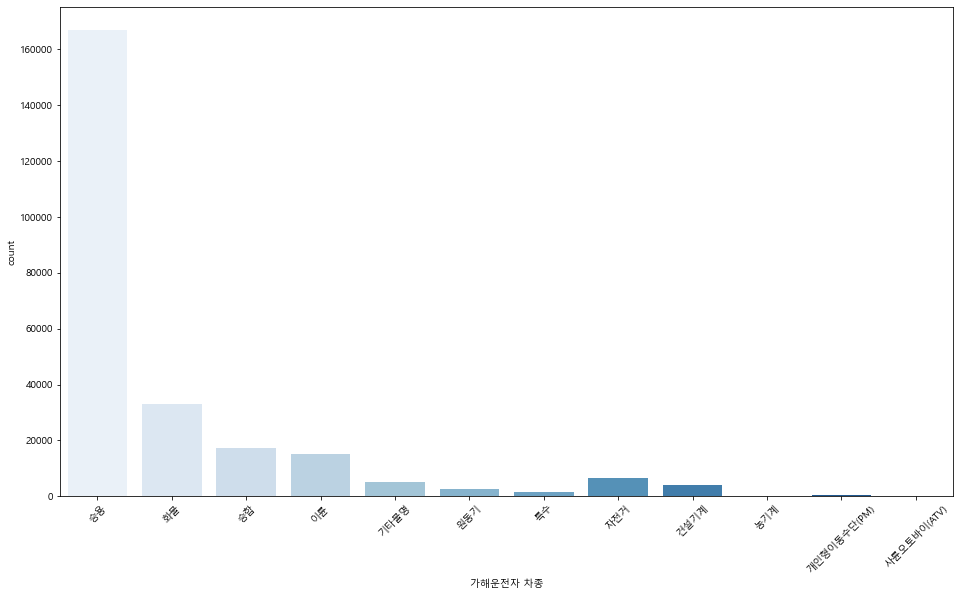

In [54]:
plt.figure(figsize=(16, 9))
sns.countplot(data=new_df, x='가해운전자 차종', palette='Blues')
plt.rcParams['font.family'] = 'Nanum Gothic'
plt.xticks(rotation = 45)

plt.show()

In [60]:
new_df['요일'] = new_df['요일'].str.replace('요일', '')

In [61]:
new_df

,일시,요일,시군구,내용,사망,중상,경상,부상신고자수,유형,법규위반,노면상태,기상상태,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도
0,2016년 1월 1일 00시,금,이천시 대월면,경상사고,0,0,2,0,차대차 - 추돌,안전운전불이행,포장 - 건조,맑음,단일로 - 기타,승용,남,37세,없음,승용,여,39세,경상
1,2016년 1월 1일 00시,금,하남시 풍산동,경상사고,0,0,4,0,차대차 - 기타,안전운전불이행,포장 - 건조,맑음,교차로 - 교차로부근,승용,남,47세,없음,승용,남,58세,경상
2,2016년 1월 1일 01시,금,파주시 탄현면,경상사고,0,0,1,0,차대차 - 추돌,안전운전불이행,포장 - 건조,맑음,교차로 - 교차로부근,승용,남,40세,없음,승용,여,58세,경상
3,2016년 1월 1일 01시,금,성남시 수정구 수진동,경상사고,0,0,1,0,차대차 - 측면충돌,신호위반,포장 - 건조,맑음,교차로 - 교차로부근,화물,남,66세,없음,승용,남,49세,경상
4,2016년 1월 1일 01시,금,이천시 부발읍,경상사고,0,0,1,0,차대차 - 기타,안전운전불이행,포장 - 기타,안개,교차로 - 교차로부근,승용,남,57세,없음,승용,남,39세,경상
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107848,2020년 12월 31일 22시,목,고양시 일산동구 식사동,경상사고,0,0,2,0,차대차 - 기타,신호위반,포장 - 건조,맑음,교차로 - 교차로안,승용,남,69세,없음,승용,남,29세,경상
107849,2020년 12월 31일 23시,목,시흥시 정왕동,중상사고,0,1,1,0,차대차 - 추돌,안전운전불이행,포장 - 건조,맑음,교차로 - 교차로부근,승용,남,28세,없음,승용,여,27세,경상
107850,2020년 12월 31일 23시,목,시흥시 정왕동,경상사고,0,0,5,1,차대차 - 추돌,기타,포장 - 건조,맑음,교차로 - 교차로부근,승용,여,46세,없음,승용,남,28세,경상
107851,2020년 12월 31일 23시,목,안양시 만안구 석수동,경상사고,0,0,2,0,차대차 - 추돌,안전운전불이행,포장 - 건조,맑음,교차로 - 교차로부근,승용,남,24세,없음,승용,여,28세,경상


In [66]:
new_df['가해운전자 연령'] = new_df['가해운전자 연령'].str.replace('세', '')
new_df['피해운전자 연령'] = new_df['피해운전자 연령'].str.replace('세', '')

In [67]:
new_df

,일시,요일,시군구,내용,사망,중상,경상,부상신고자수,유형,법규위반,노면상태,기상상태,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도
0,2016년 1월 1일 00시,금,이천시 대월면,경상사고,0,0,2,0,차대차 - 추돌,안전운전불이행,포장 - 건조,맑음,단일로 - 기타,승용,남,37,없음,승용,여,39,경상
1,2016년 1월 1일 00시,금,하남시 풍산동,경상사고,0,0,4,0,차대차 - 기타,안전운전불이행,포장 - 건조,맑음,교차로 - 교차로부근,승용,남,47,없음,승용,남,58,경상
2,2016년 1월 1일 01시,금,파주시 탄현면,경상사고,0,0,1,0,차대차 - 추돌,안전운전불이행,포장 - 건조,맑음,교차로 - 교차로부근,승용,남,40,없음,승용,여,58,경상
3,2016년 1월 1일 01시,금,성남시 수정구 수진동,경상사고,0,0,1,0,차대차 - 측면충돌,신호위반,포장 - 건조,맑음,교차로 - 교차로부근,화물,남,66,없음,승용,남,49,경상
4,2016년 1월 1일 01시,금,이천시 부발읍,경상사고,0,0,1,0,차대차 - 기타,안전운전불이행,포장 - 기타,안개,교차로 - 교차로부근,승용,남,57,없음,승용,남,39,경상
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107848,2020년 12월 31일 22시,목,고양시 일산동구 식사동,경상사고,0,0,2,0,차대차 - 기타,신호위반,포장 - 건조,맑음,교차로 - 교차로안,승용,남,69,없음,승용,남,29,경상
107849,2020년 12월 31일 23시,목,시흥시 정왕동,중상사고,0,1,1,0,차대차 - 추돌,안전운전불이행,포장 - 건조,맑음,교차로 - 교차로부근,승용,남,28,없음,승용,여,27,경상
107850,2020년 12월 31일 23시,목,시흥시 정왕동,경상사고,0,0,5,1,차대차 - 추돌,기타,포장 - 건조,맑음,교차로 - 교차로부근,승용,여,46,없음,승용,남,28,경상
107851,2020년 12월 31일 23시,목,안양시 만안구 석수동,경상사고,0,0,2,0,차대차 - 추돌,안전운전불이행,포장 - 건조,맑음,교차로 - 교차로부근,승용,남,24,없음,승용,여,28,경상


In [80]:
data_list = new_df['일시'].str.split('년')

data_list

0           [2016,  1월 1일 00시]
1           [2016,  1월 1일 00시]
2           [2016,  1월 1일 01시]
3           [2016,  1월 1일 01시]
4           [2016,  1월 1일 01시]
                  ...         
107848    [2020,  12월 31일 22시]
107849    [2020,  12월 31일 23시]
107850    [2020,  12월 31일 23시]
107851    [2020,  12월 31일 23시]
107853    [2020,  12월 31일 23시]
Name: 일시, Length: 252615, dtype: object

In [81]:
data_list.str.get(0)

0         2016
1         2016
2         2016
3         2016
4         2016
          ... 
107848    2020
107849    2020
107850    2020
107851    2020
107853    2020
Name: 일시, Length: 252615, dtype: object

In [84]:
data_list2 = data_list.str.get(1)

data_list2

0            1월 1일 00시
1            1월 1일 00시
2            1월 1일 01시
3            1월 1일 01시
4            1월 1일 01시
              ...     
107848     12월 31일 22시
107849     12월 31일 23시
107850     12월 31일 23시
107851     12월 31일 23시
107853     12월 31일 23시
Name: 일시, Length: 252615, dtype: object

In [87]:
data_list2 = data_list2.str.split(' ')

data_list2

0           [, 1월, 1일, 00시]
1           [, 1월, 1일, 00시]
2           [, 1월, 1일, 01시]
3           [, 1월, 1일, 01시]
4           [, 1월, 1일, 01시]
                ...        
107848    [, 12월, 31일, 22시]
107849    [, 12월, 31일, 23시]
107850    [, 12월, 31일, 23시]
107851    [, 12월, 31일, 23시]
107853    [, 12월, 31일, 23시]
Name: 일시, Length: 252615, dtype: object

In [83]:
new_df['연도'] = data_list.str.get(0)

new_df

,일시,요일,시군구,내용,사망,중상,경상,부상신고자수,유형,법규위반,노면상태,기상상태,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,연도
0,2016년 1월 1일 00시,금,이천시 대월면,경상사고,0,0,2,0,차대차 - 추돌,안전운전불이행,포장 - 건조,맑음,단일로 - 기타,승용,남,37,없음,승용,여,39,경상,2016
1,2016년 1월 1일 00시,금,하남시 풍산동,경상사고,0,0,4,0,차대차 - 기타,안전운전불이행,포장 - 건조,맑음,교차로 - 교차로부근,승용,남,47,없음,승용,남,58,경상,2016
2,2016년 1월 1일 01시,금,파주시 탄현면,경상사고,0,0,1,0,차대차 - 추돌,안전운전불이행,포장 - 건조,맑음,교차로 - 교차로부근,승용,남,40,없음,승용,여,58,경상,2016
3,2016년 1월 1일 01시,금,성남시 수정구 수진동,경상사고,0,0,1,0,차대차 - 측면충돌,신호위반,포장 - 건조,맑음,교차로 - 교차로부근,화물,남,66,없음,승용,남,49,경상,2016
4,2016년 1월 1일 01시,금,이천시 부발읍,경상사고,0,0,1,0,차대차 - 기타,안전운전불이행,포장 - 기타,안개,교차로 - 교차로부근,승용,남,57,없음,승용,남,39,경상,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107848,2020년 12월 31일 22시,목,고양시 일산동구 식사동,경상사고,0,0,2,0,차대차 - 기타,신호위반,포장 - 건조,맑음,교차로 - 교차로안,승용,남,69,없음,승용,남,29,경상,2020
107849,2020년 12월 31일 23시,목,시흥시 정왕동,중상사고,0,1,1,0,차대차 - 추돌,안전운전불이행,포장 - 건조,맑음,교차로 - 교차로부근,승용,남,28,없음,승용,여,27,경상,2020
107850,2020년 12월 31일 23시,목,시흥시 정왕동,경상사고,0,0,5,1,차대차 - 추돌,기타,포장 - 건조,맑음,교차로 - 교차로부근,승용,여,46,없음,승용,남,28,경상,2020
107851,2020년 12월 31일 23시,목,안양시 만안구 석수동,경상사고,0,0,2,0,차대차 - 추돌,안전운전불이행,포장 - 건조,맑음,교차로 - 교차로부근,승용,남,24,없음,승용,여,28,경상,2020


In [88]:
data_list2.str.get(1)

0          1월
1          1월
2          1월
3          1월
4          1월
         ... 
107848    12월
107849    12월
107850    12월
107851    12월
107853    12월
Name: 일시, Length: 252615, dtype: object

In [89]:
new_df['월'] = data_list2.str.get(1)

new_df

,일시,요일,시군구,내용,사망,중상,경상,부상신고자수,유형,법규위반,노면상태,...,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,연도,월
0,2016년 1월 1일 00시,금,이천시 대월면,경상사고,0,0,2,0,차대차 - 추돌,안전운전불이행,포장 - 건조,...,단일로 - 기타,승용,남,37,없음,승용,여,39,경상,2016,1월
1,2016년 1월 1일 00시,금,하남시 풍산동,경상사고,0,0,4,0,차대차 - 기타,안전운전불이행,포장 - 건조,...,교차로 - 교차로부근,승용,남,47,없음,승용,남,58,경상,2016,1월
2,2016년 1월 1일 01시,금,파주시 탄현면,경상사고,0,0,1,0,차대차 - 추돌,안전운전불이행,포장 - 건조,...,교차로 - 교차로부근,승용,남,40,없음,승용,여,58,경상,2016,1월
3,2016년 1월 1일 01시,금,성남시 수정구 수진동,경상사고,0,0,1,0,차대차 - 측면충돌,신호위반,포장 - 건조,...,교차로 - 교차로부근,화물,남,66,없음,승용,남,49,경상,2016,1월
4,2016년 1월 1일 01시,금,이천시 부발읍,경상사고,0,0,1,0,차대차 - 기타,안전운전불이행,포장 - 기타,...,교차로 - 교차로부근,승용,남,57,없음,승용,남,39,경상,2016,1월
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107848,2020년 12월 31일 22시,목,고양시 일산동구 식사동,경상사고,0,0,2,0,차대차 - 기타,신호위반,포장 - 건조,...,교차로 - 교차로안,승용,남,69,없음,승용,남,29,경상,2020,12월
107849,2020년 12월 31일 23시,목,시흥시 정왕동,중상사고,0,1,1,0,차대차 - 추돌,안전운전불이행,포장 - 건조,...,교차로 - 교차로부근,승용,남,28,없음,승용,여,27,경상,2020,12월
107850,2020년 12월 31일 23시,목,시흥시 정왕동,경상사고,0,0,5,1,차대차 - 추돌,기타,포장 - 건조,...,교차로 - 교차로부근,승용,여,46,없음,승용,남,28,경상,2020,12월
107851,2020년 12월 31일 23시,목,안양시 만안구 석수동,경상사고,0,0,2,0,차대차 - 추돌,안전운전불이행,포장 - 건조,...,교차로 - 교차로부근,승용,남,24,없음,승용,여,28,경상,2020,12월


In [90]:
new_df['일'] = data_list2.str.get(2)

new_df

,일시,요일,시군구,내용,사망,중상,경상,부상신고자수,유형,법규위반,노면상태,...,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,연도,월,일
0,2016년 1월 1일 00시,금,이천시 대월면,경상사고,0,0,2,0,차대차 - 추돌,안전운전불이행,포장 - 건조,...,승용,남,37,없음,승용,여,39,경상,2016,1월,1일
1,2016년 1월 1일 00시,금,하남시 풍산동,경상사고,0,0,4,0,차대차 - 기타,안전운전불이행,포장 - 건조,...,승용,남,47,없음,승용,남,58,경상,2016,1월,1일
2,2016년 1월 1일 01시,금,파주시 탄현면,경상사고,0,0,1,0,차대차 - 추돌,안전운전불이행,포장 - 건조,...,승용,남,40,없음,승용,여,58,경상,2016,1월,1일
3,2016년 1월 1일 01시,금,성남시 수정구 수진동,경상사고,0,0,1,0,차대차 - 측면충돌,신호위반,포장 - 건조,...,화물,남,66,없음,승용,남,49,경상,2016,1월,1일
4,2016년 1월 1일 01시,금,이천시 부발읍,경상사고,0,0,1,0,차대차 - 기타,안전운전불이행,포장 - 기타,...,승용,남,57,없음,승용,남,39,경상,2016,1월,1일
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107848,2020년 12월 31일 22시,목,고양시 일산동구 식사동,경상사고,0,0,2,0,차대차 - 기타,신호위반,포장 - 건조,...,승용,남,69,없음,승용,남,29,경상,2020,12월,31일
107849,2020년 12월 31일 23시,목,시흥시 정왕동,중상사고,0,1,1,0,차대차 - 추돌,안전운전불이행,포장 - 건조,...,승용,남,28,없음,승용,여,27,경상,2020,12월,31일
107850,2020년 12월 31일 23시,목,시흥시 정왕동,경상사고,0,0,5,1,차대차 - 추돌,기타,포장 - 건조,...,승용,여,46,없음,승용,남,28,경상,2020,12월,31일
107851,2020년 12월 31일 23시,목,안양시 만안구 석수동,경상사고,0,0,2,0,차대차 - 추돌,안전운전불이행,포장 - 건조,...,승용,남,24,없음,승용,여,28,경상,2020,12월,31일


In [91]:
new_df['발생시각'] = data_list2.str.get(3)

new_df

,일시,요일,시군구,내용,사망,중상,경상,부상신고자수,유형,법규위반,노면상태,...,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,연도,월,일,발생시각
0,2016년 1월 1일 00시,금,이천시 대월면,경상사고,0,0,2,0,차대차 - 추돌,안전운전불이행,포장 - 건조,...,남,37,없음,승용,여,39,경상,2016,1월,1일,00시
1,2016년 1월 1일 00시,금,하남시 풍산동,경상사고,0,0,4,0,차대차 - 기타,안전운전불이행,포장 - 건조,...,남,47,없음,승용,남,58,경상,2016,1월,1일,00시
2,2016년 1월 1일 01시,금,파주시 탄현면,경상사고,0,0,1,0,차대차 - 추돌,안전운전불이행,포장 - 건조,...,남,40,없음,승용,여,58,경상,2016,1월,1일,01시
3,2016년 1월 1일 01시,금,성남시 수정구 수진동,경상사고,0,0,1,0,차대차 - 측면충돌,신호위반,포장 - 건조,...,남,66,없음,승용,남,49,경상,2016,1월,1일,01시
4,2016년 1월 1일 01시,금,이천시 부발읍,경상사고,0,0,1,0,차대차 - 기타,안전운전불이행,포장 - 기타,...,남,57,없음,승용,남,39,경상,2016,1월,1일,01시
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107848,2020년 12월 31일 22시,목,고양시 일산동구 식사동,경상사고,0,0,2,0,차대차 - 기타,신호위반,포장 - 건조,...,남,69,없음,승용,남,29,경상,2020,12월,31일,22시
107849,2020년 12월 31일 23시,목,시흥시 정왕동,중상사고,0,1,1,0,차대차 - 추돌,안전운전불이행,포장 - 건조,...,남,28,없음,승용,여,27,경상,2020,12월,31일,23시
107850,2020년 12월 31일 23시,목,시흥시 정왕동,경상사고,0,0,5,1,차대차 - 추돌,기타,포장 - 건조,...,여,46,없음,승용,남,28,경상,2020,12월,31일,23시
107851,2020년 12월 31일 23시,목,안양시 만안구 석수동,경상사고,0,0,2,0,차대차 - 추돌,안전운전불이행,포장 - 건조,...,남,24,없음,승용,여,28,경상,2020,12월,31일,23시


In [92]:
new_df.drop(columns='일시', inplace=True)

In [93]:
new_df

,요일,시군구,내용,사망,중상,경상,부상신고자수,유형,법규위반,노면상태,기상상태,...,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,연도,월,일,발생시각
0,금,이천시 대월면,경상사고,0,0,2,0,차대차 - 추돌,안전운전불이행,포장 - 건조,맑음,...,남,37,없음,승용,여,39,경상,2016,1월,1일,00시
1,금,하남시 풍산동,경상사고,0,0,4,0,차대차 - 기타,안전운전불이행,포장 - 건조,맑음,...,남,47,없음,승용,남,58,경상,2016,1월,1일,00시
2,금,파주시 탄현면,경상사고,0,0,1,0,차대차 - 추돌,안전운전불이행,포장 - 건조,맑음,...,남,40,없음,승용,여,58,경상,2016,1월,1일,01시
3,금,성남시 수정구 수진동,경상사고,0,0,1,0,차대차 - 측면충돌,신호위반,포장 - 건조,맑음,...,남,66,없음,승용,남,49,경상,2016,1월,1일,01시
4,금,이천시 부발읍,경상사고,0,0,1,0,차대차 - 기타,안전운전불이행,포장 - 기타,안개,...,남,57,없음,승용,남,39,경상,2016,1월,1일,01시
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107848,목,고양시 일산동구 식사동,경상사고,0,0,2,0,차대차 - 기타,신호위반,포장 - 건조,맑음,...,남,69,없음,승용,남,29,경상,2020,12월,31일,22시
107849,목,시흥시 정왕동,중상사고,0,1,1,0,차대차 - 추돌,안전운전불이행,포장 - 건조,맑음,...,남,28,없음,승용,여,27,경상,2020,12월,31일,23시
107850,목,시흥시 정왕동,경상사고,0,0,5,1,차대차 - 추돌,기타,포장 - 건조,맑음,...,여,46,없음,승용,남,28,경상,2020,12월,31일,23시
107851,목,안양시 만안구 석수동,경상사고,0,0,2,0,차대차 - 추돌,안전운전불이행,포장 - 건조,맑음,...,남,24,없음,승용,여,28,경상,2020,12월,31일,23시


In [111]:
test = new_df.groupby(['연도', '월', '내용'])['내용'].count()

test

연도    월    내용    
2016  10월  경상사고      2825
           부상신고사고     240
           사망사고        60
           중상사고      1341
      11월  경상사고      2713
                     ... 
2020  8월   중상사고       870
      9월   경상사고      3120
           부상신고사고     220
           사망사고        51
           중상사고       949
Name: 내용, Length: 240, dtype: int64

In [112]:
test = test.to_frame()

test

내용
연도   월   내용          
2016 10월 경상사고    2825
         부상신고사고   240
         사망사고      60
         중상사고    1341
     11월 경상사고    2713
...               ...
2020 8월  중상사고     870
     9월  경상사고    3120
         부상신고사고   220
         사망사고      51
         중상사고     949

[240 rows x 1 columns]

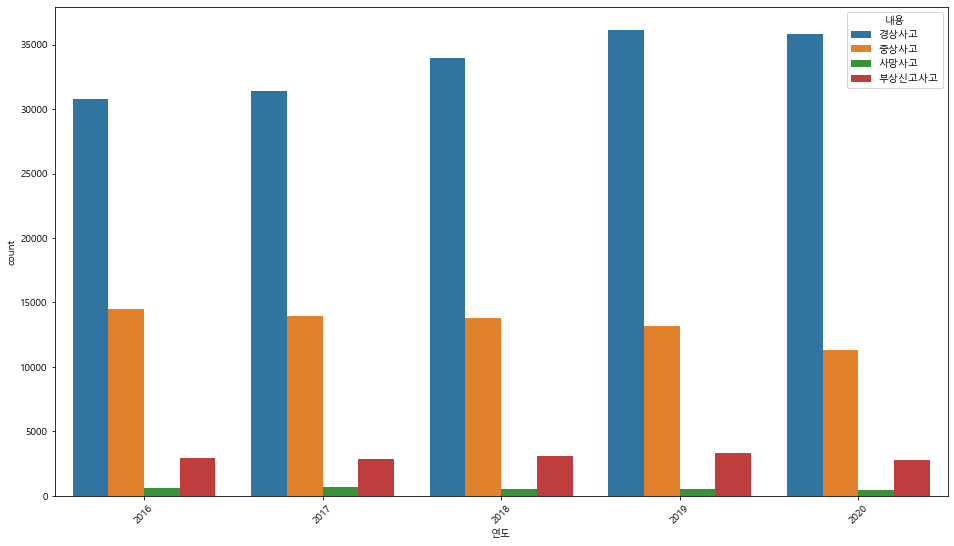

In [122]:
plt.figure(figsize=(16, 9))
sns.countplot(data=new_df, x='연도', hue='내용')
plt.rcParams['font.family'] = 'Nanum Gothic'
plt.xticks(rotation = 45)

plt.show()

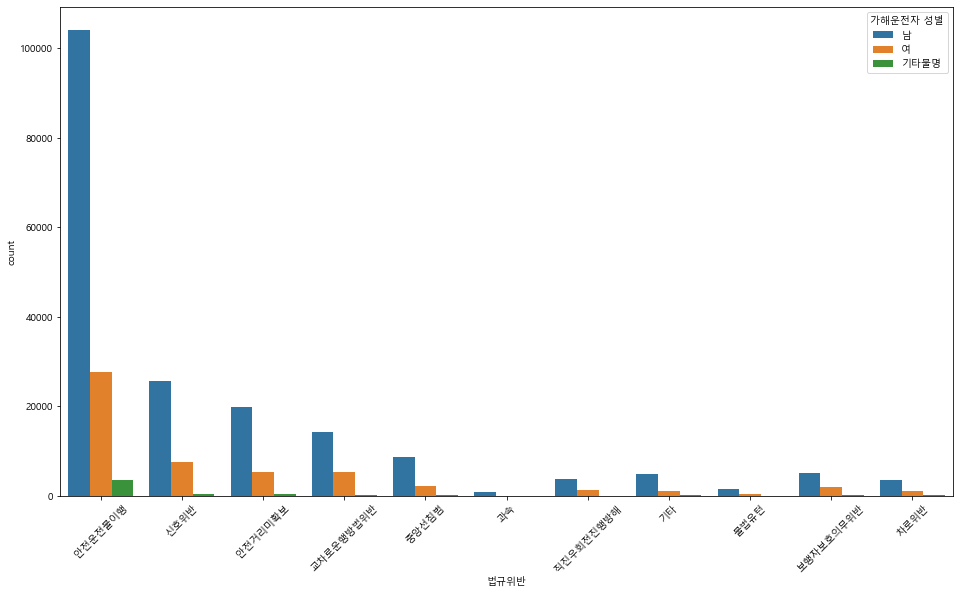

In [135]:
plt.figure(figsize=(16, 9))
sns.countplot(data=new_df, x='법규위반', hue = '가해운전자 성별')
plt.rcParams['font.family'] = 'Nanum Gothic'
plt.xticks(rotation = 45)

plt.show()

In [136]:
new_df.corr()

,사망,중상,경상,부상신고자수
사망,1.000000,-0.010506,-0.063608,-0.009362
중상,-0.010506,1.000000,-0.226721,-0.038224
경상,-0.063608,-0.226721,1.000000,-0.020782
부상신고자수,-0.009362,-0.038224,-0.020782,1.000000


In [137]:
new_df

,요일,시군구,내용,사망,중상,경상,부상신고자수,유형,법규위반,노면상태,기상상태,...,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,연도,월,일,발생시각
0,금,이천시 대월면,경상사고,0,0,2,0,차대차 - 추돌,안전운전불이행,포장 - 건조,맑음,...,남,37,없음,승용,여,39,경상,2016,1월,1일,00시
1,금,하남시 풍산동,경상사고,0,0,4,0,차대차 - 기타,안전운전불이행,포장 - 건조,맑음,...,남,47,없음,승용,남,58,경상,2016,1월,1일,00시
2,금,파주시 탄현면,경상사고,0,0,1,0,차대차 - 추돌,안전운전불이행,포장 - 건조,맑음,...,남,40,없음,승용,여,58,경상,2016,1월,1일,01시
3,금,성남시 수정구 수진동,경상사고,0,0,1,0,차대차 - 측면충돌,신호위반,포장 - 건조,맑음,...,남,66,없음,승용,남,49,경상,2016,1월,1일,01시
4,금,이천시 부발읍,경상사고,0,0,1,0,차대차 - 기타,안전운전불이행,포장 - 기타,안개,...,남,57,없음,승용,남,39,경상,2016,1월,1일,01시
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107848,목,고양시 일산동구 식사동,경상사고,0,0,2,0,차대차 - 기타,신호위반,포장 - 건조,맑음,...,남,69,없음,승용,남,29,경상,2020,12월,31일,22시
107849,목,시흥시 정왕동,중상사고,0,1,1,0,차대차 - 추돌,안전운전불이행,포장 - 건조,맑음,...,남,28,없음,승용,여,27,경상,2020,12월,31일,23시
107850,목,시흥시 정왕동,경상사고,0,0,5,1,차대차 - 추돌,기타,포장 - 건조,맑음,...,여,46,없음,승용,남,28,경상,2020,12월,31일,23시
107851,목,안양시 만안구 석수동,경상사고,0,0,2,0,차대차 - 추돌,안전운전불이행,포장 - 건조,맑음,...,남,24,없음,승용,여,28,경상,2020,12월,31일,23시


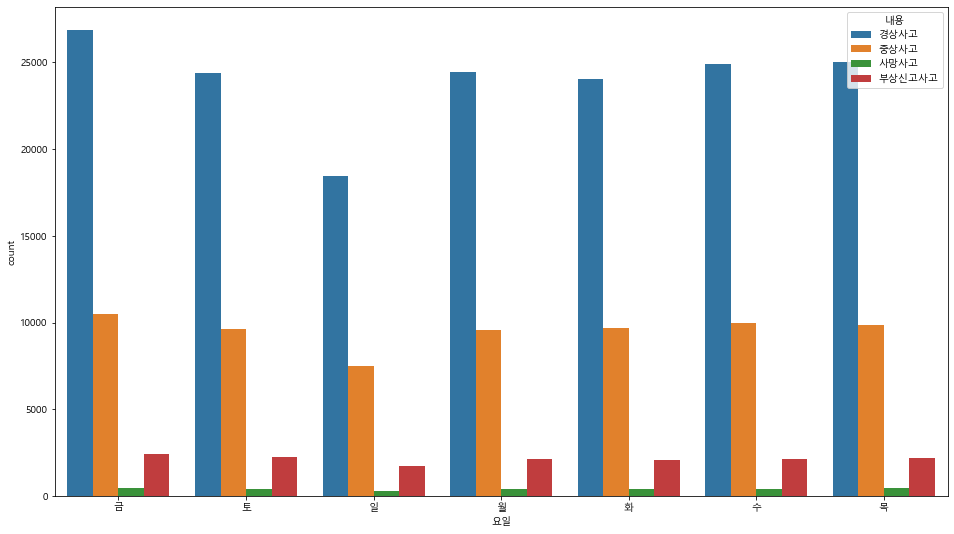

In [151]:
plt.figure(figsize=(16, 9))
sns.countplot(data=new_df, x='요일', hue='내용')
plt.rcParams['font.family'] = 'Nanum Gothic'

plt.show()

In [153]:
new_df['시군구'].value_counts().head(10)

 시흥시 정왕동        5128
 안산시 단원구 고잔동    3072
 부천시 중동         2750
 의정부시 의정부동      2171
 부천시 상동         2110
 수원시 팔달구 인계동    2077
 안산시 상록구 본오동    2009
 남양주시 화도읍       1940
 안산시 상록구 사동     1848
 안양시 동안구 호계동    1831
Name: 시군구, dtype: int64

In [157]:
test3_df = new_df.groupby(['시군구', '노면상태', '유형'])['유형'].count()

In [ ]:
test3_df = test3_df.to_frame()

test3_df

In [170]:
new_test3 = test3_df.loc[test3_df['유형'] >= 50]

In [177]:
new_test3.head(20)

유형
시군구          노면상태    유형             
 가평군 가평읍     포장 - 건조 차대차 - 기타    126
                     차대차 - 추돌     59
                     차대차 - 측면충돌  170
 가평군 설악면     포장 - 건조 차대차 - 측면충돌   86
 가평군 청평면     포장 - 건조 차대차 - 기타    131
                     차대차 - 추돌    154
                     차대차 - 측면충돌  178
 고양시 덕양구 고양동 포장 - 건조 차대차 - 측면충돌   97
 고양시 덕양구 관산동 포장 - 건조 차대차 - 추돌     75
                     차대차 - 측면충돌  103
 고양시 덕양구 내유동 포장 - 건조 차대차 - 측면충돌   55
 고양시 덕양구 대자동 포장 - 건조 차대차 - 추돌     59
                     차대차 - 측면충돌   59
 고양시 덕양구 덕은동 포장 - 건조 차대차 - 추돌     83
                     차대차 - 측면충돌   73
 고양시 덕양구 도내동 포장 - 건조 차대차 - 측면충돌   79
 고양시 덕양구 동산동 포장 - 건조 차대차 - 측면충돌   88
 고양시 덕양구 삼송동 포장 - 건조 차대차 - 측면충돌   77
 고양시 덕양구 성사동 포장 - 건조 차대차 - 기타     78
                     차대차 - 추돌     67

In [180]:
new_df.reset_index(drop=True, inplace=True)

In [182]:
new_df.drop(columns='index', inplace=True)

In [183]:
new_df

,요일,시군구,내용,사망,중상,경상,부상신고자수,유형,법규위반,노면상태,기상상태,...,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,연도,월,일,발생시각
0,금,이천시 대월면,경상사고,0,0,2,0,차대차 - 추돌,안전운전불이행,포장 - 건조,맑음,...,남,37,없음,승용,여,39,경상,2016,1월,1일,00시
1,금,하남시 풍산동,경상사고,0,0,4,0,차대차 - 기타,안전운전불이행,포장 - 건조,맑음,...,남,47,없음,승용,남,58,경상,2016,1월,1일,00시
2,금,파주시 탄현면,경상사고,0,0,1,0,차대차 - 추돌,안전운전불이행,포장 - 건조,맑음,...,남,40,없음,승용,여,58,경상,2016,1월,1일,01시
3,금,성남시 수정구 수진동,경상사고,0,0,1,0,차대차 - 측면충돌,신호위반,포장 - 건조,맑음,...,남,66,없음,승용,남,49,경상,2016,1월,1일,01시
4,금,이천시 부발읍,경상사고,0,0,1,0,차대차 - 기타,안전운전불이행,포장 - 기타,안개,...,남,57,없음,승용,남,39,경상,2016,1월,1일,01시
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252610,목,고양시 일산동구 식사동,경상사고,0,0,2,0,차대차 - 기타,신호위반,포장 - 건조,맑음,...,남,69,없음,승용,남,29,경상,2020,12월,31일,22시
252611,목,시흥시 정왕동,중상사고,0,1,1,0,차대차 - 추돌,안전운전불이행,포장 - 건조,맑음,...,남,28,없음,승용,여,27,경상,2020,12월,31일,23시
252612,목,시흥시 정왕동,경상사고,0,0,5,1,차대차 - 추돌,기타,포장 - 건조,맑음,...,여,46,없음,승용,남,28,경상,2020,12월,31일,23시
252613,목,안양시 만안구 석수동,경상사고,0,0,2,0,차대차 - 추돌,안전운전불이행,포장 - 건조,맑음,...,남,24,없음,승용,여,28,경상,2020,12월,31일,23시


In [184]:
new_df.to_csv('D:/Gray_Bigdata/src/00_Projects/data/sample.csv', encoding='CP949')

In [189]:
new_df.loc[ :, '시군구' == '시흥시 정왕동']

KeyError: False